In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv("prime.csv")

In [282]:
df.shape

(8807, 12)

THE DATASET CONTAINS 8807 RECORDES AND 12 FEATURES

In [283]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [285]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

HANDELING MISSING VALUES

In [286]:
df["duration"] = df["duration"].fillna(df["duration"].mode()[0])

In [287]:
df["rating"]= df["rating"].fillna(df["rating"].mode()[0])

In [288]:
df = df[df["date_added"].notna()]

In [289]:
df = df[df["country"].notna()]

In [290]:
df = df[df["cast"].notna()]

In [291]:
df = df[df["director"].notna()]

In [292]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

REMOVING OF OUTLIERS  

In [293]:
df = df.drop(df[df["rating"] == "74 min"].index, axis = 0)
df = df.drop(df[df["rating"] == "84 min"].index, axis = 0)
df = df.drop(df[df["rating"] == "66 min"].index, axis = 0)

In [296]:
df  = df.reset_index(drop = True)

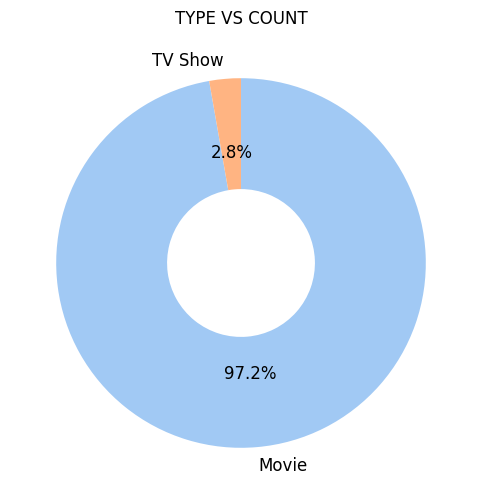

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
counts = df["type"].value_counts()
plt.title("TYPE VS COUNT")
sns.set_palette('pastel')
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.show()


"Compared to TV shows, movies exhibit a significantly higher upload rate, covering an impressive 97.2 percent of the total content uploaded."

<Axes: title={'center': 'MOVIES VS RATNG'}>

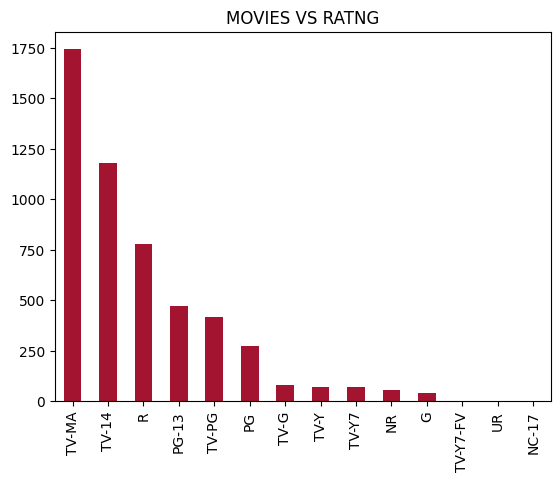

In [346]:
df[df["type"] == "Movie"]["rating"].value_counts().plot(kind = "bar", title = "MOVIES VS RATNG", color = "#A2142F")

### In the realm of movie ratings, the TV-MA classification claims the top spot, boasting an impressive count of 1750 ratings, surpassing all other categories by a significant margin.

<Axes: title={'center': 'TOP 15 DIRECTOR WHO HAVE DIRECTED THE MOST'}>

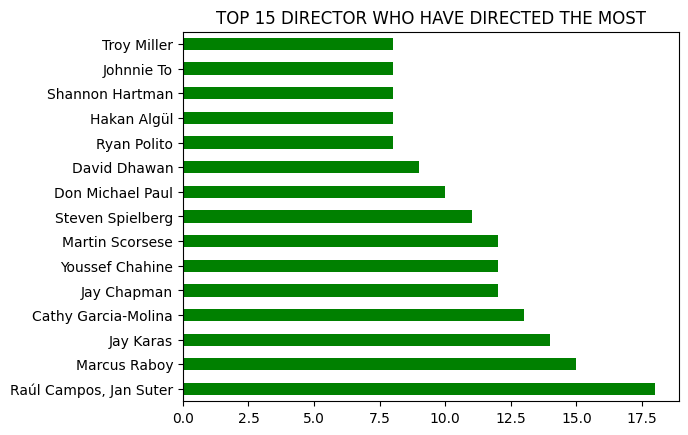

In [347]:
df["director"].value_counts().head(15).plot(kind = "barh", title = "TOP 15 DIRECTOR WHO HAVE DIRECTED THE MOST", color="green")

<Axes: >

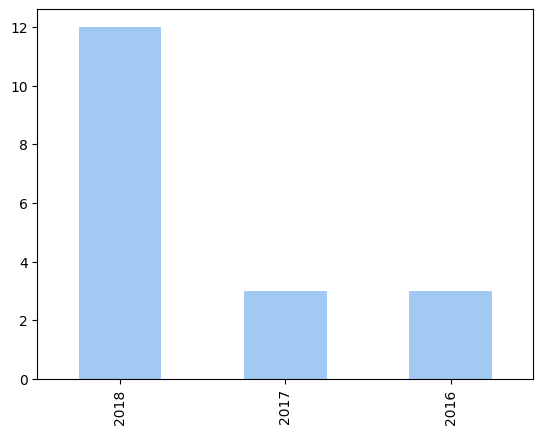

In [303]:
df[df["director"] == "Raúl Campos, Jan Suter"]["release_year"].value_counts().plot(kind = "bar")

### The majority of the movies, a total of 18, were published and directed by Raúl Campos and Jan Suter, predominantly in the year 2018.

In [304]:
def number(cast):
  return len(cast.split(","))

In [305]:
df["Number_of_Cast"] = df["cast"].apply(lambda x : number(x))

<Axes: title={'center': 'TOP 10 MOVES WITH MAX NO OF CAST'}, ylabel='title'>

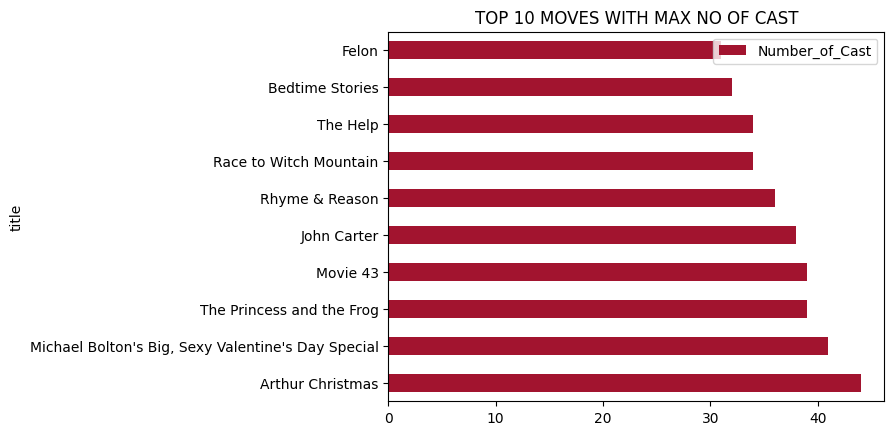

In [324]:
df.sort_values("Number_of_Cast", ascending = False).head(10)[["title","Number_of_Cast", "rating"]].plot(kind = "barh", x = "title", y = "Number_of_Cast", title = "TOP 10 MOVES WITH MAX NO OF CAST", color = "#A2142F")

In [308]:
for x in df[df["title"]=="Arthur Christmas"]["cast"]:
  print(x)

James McAvoy, Hugh Laurie, Bill Nighy, Jim Broadbent, Imelda Staunton, Ashley Jensen, Ramona Marquez, Marc Wootton, Laura Linney, Eva Longoria, Michael Palin, Joan Cusack, Deborah Findlay, Rich Fulcher, Sarah Smith, Clint Dyer, Kerry Shale, Stewart Lee, Bronagh Gallagher, Kevin Cecil, Alistair McGowan, David Menkin, Kris Pearn, Ian Ashpitel, Rich Hall, Seeta Indrani, Jane Horrocks, Peter Baynham, Emma Kennedy, Dominic West, Jerry Lambert, Julia Davis, Robbie Coltrane, Iain McKee, Sanjeev Bhaskar, Andy Serkis, Tamsin Greig, Rhys Darby, Seamus Malone, Cody Cameron, David Schneider, Kevin Eldon, Danny John-Jules, Brian Cummings


In [309]:
df[df["title"]=="Arthur Christmas"]["listed_in"]

3488    Children & Family Movies, Comedies
Name: listed_in, dtype: object

### The Movie Arthur christmas movie has the higest number of cast around 44
### The casts are
James McAvoy, Hugh Laurie, Bill Nighy, Jim Broadbent, Imelda Staunton, Ashley Jensen, Ramona Marquez, Marc Wootton, Laura Linney, Eva Longoria, Michael Palin, Joan Cusack, Deborah Findlay, Rich Fulcher, Sarah Smith, Clint Dyer, Kerry Shale, Stewart Lee, Bronagh Gallagher, Kevin Cecil, Alistair McGowan, David Menkin, Kris Pearn, Ian Ashpitel, Rich Hall, Seeta Indrani, Jane Horrocks, Peter Baynham, Emma Kennedy, Dominic West, Jerry Lambert, Julia Davis, Robbie Coltrane, Iain McKee, Sanjeev Bhaskar, Andy Serkis, Tamsin Greig, Rhys Darby, Seamus Malone, Cody Cameron, David Schneider, Kevin Eldon, Danny John-Jules, Brian Cummings


## Which is listed in Children & Family Movies, Comedies

In [310]:
my_dict = {}

In [311]:
def listed_in_movies(data):
  global my_dict

  data = data.split(",")
  for x in data:
    try:
      my_dict[x] +=1

    except:
      my_dict[x] = 1


In [312]:
df["listed_in"].apply(lambda x : listed_in_movies(x))

0       None
1       None
2       None
3       None
4       None
        ... 
5328    None
5329    None
5330    None
5331    None
5332    None
Name: listed_in, Length: 5333, dtype: object

In [321]:
cat = pd.DataFrame(list(my_dict.items()), columns=['Category', 'Count'])

<Axes: title={'center': 'TOP 10 LISTED IN CATEGORY'}, xlabel='Category'>

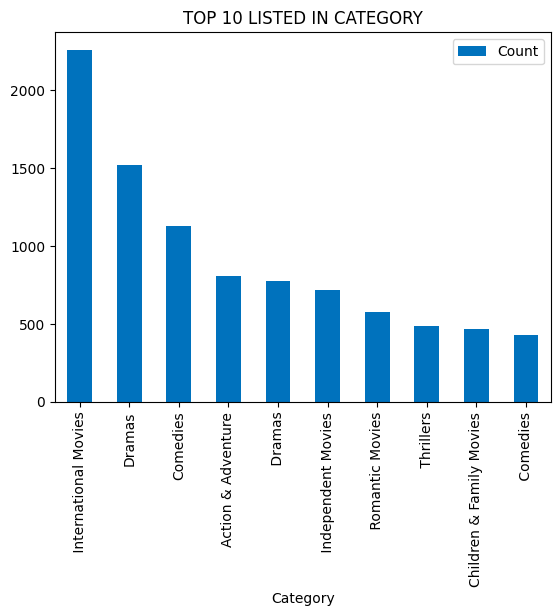

In [322]:
cat.sort_values('Count', ascending=False).head(10).plot(kind = "bar", x = "Category", y = "Count", title = "TOP 10 LISTED IN CATEGORY", color = "#0072BD")

Most of the people prefer International movies compared to other which is leading by 2260

<Axes: title={'center': 'TOP 10 DATES ON WHICH THE MOST MOVIES HAS BEEN ADDES'}>

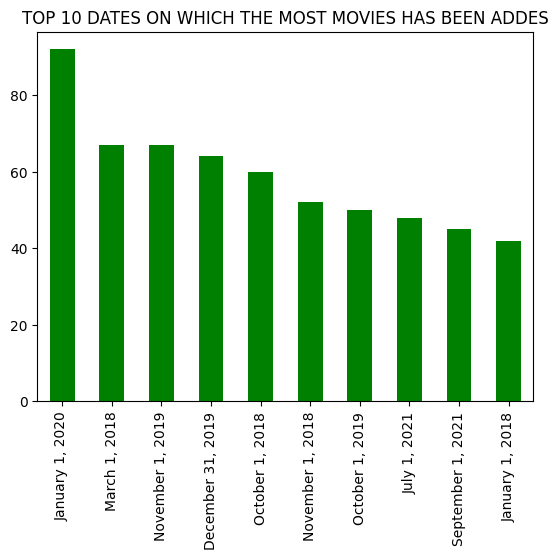

In [345]:
df["date_added"].value_counts().head(10).plot(kind="bar", color="green", title = "TOP 10 DATES ON WHICH THE MOST MOVIES HAS BEEN ADDES")

### On new year (JAN 1,2020) most of the videos was uploaded in the prime which is around 92, compared to other dates

<Axes: >

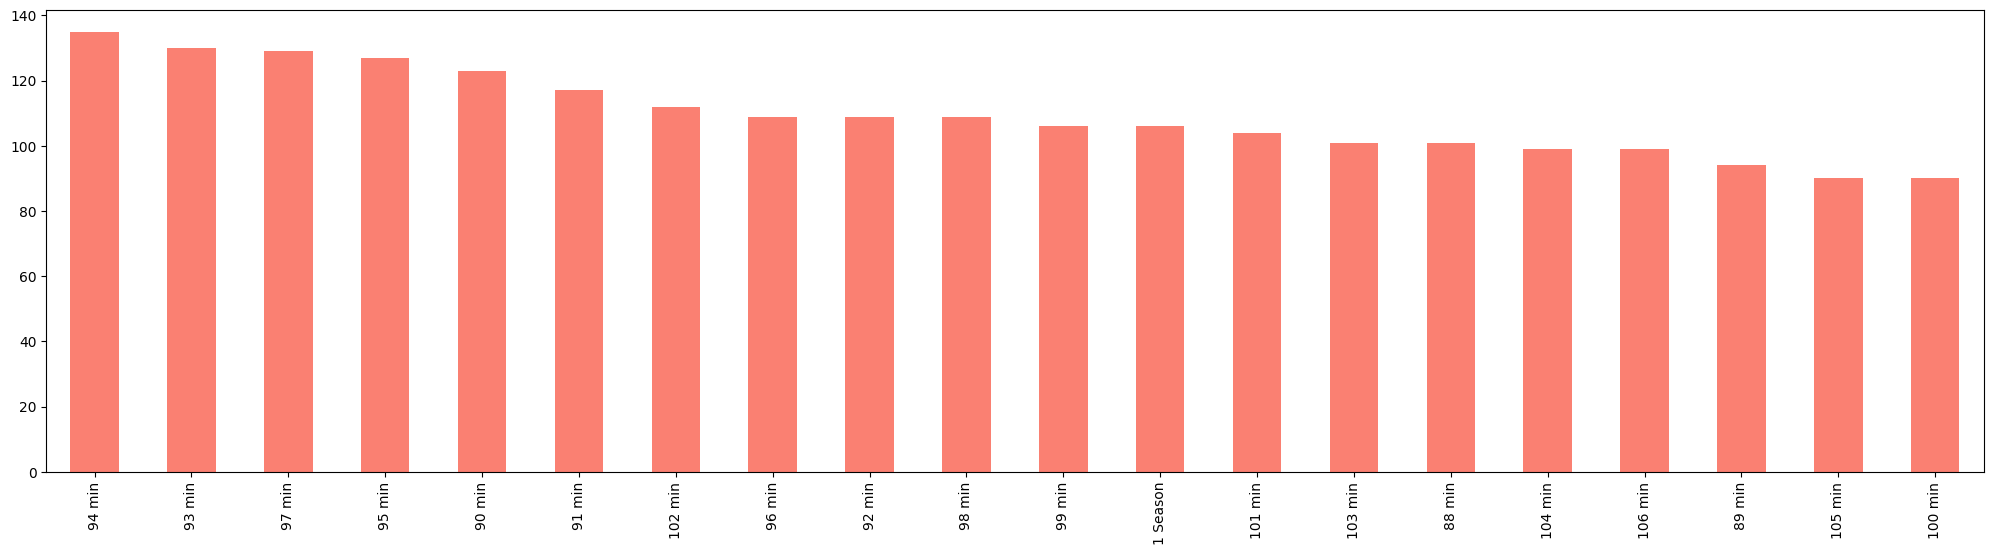

In [343]:
df["duration"].value_counts().head(20).plot(kind = "bar", color = "salmon", figsize = (25,6))

In [336]:
df[df["duration"]=="94 min"]["rating"].mode()

0    TV-MA
Name: rating, dtype: object

### Most of the content has an average watch time of approximately 94 minutes, and the majority of the movies have been rated as TV-MA.